# Plot Bot

In [1]:
# importing all dependencies

import tweepy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import time



In [ ]:
# used  appropriate methods from vadersentiment to analyze data

In [2]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# twitter consumer keys and access tokens initialized in environmental variables

In [3]:
consumer_key = os.environ['twitter_consumer_key']
consumer_secret=os.environ['twitter_consumer_secret']
access_token = os.environ['access_token']
access_token_secret=os.environ['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
twitter_user ="NBCSWarriors"
#"@sachin_rt"

counter = 1

#variable to hold sentiments
sentiments = []

old_tweet = None
compound_list = []
positive_list = []
negative_list = []
neutral_list =  []
    
#loop through 5 pages if tweets for 100 tweets
for page in range(5):
    
    NBCwarriors_tweets = api.user_timeline(twitter_user,count=100,
                                   max_id = old_tweet)
    for tweets in NBCwarriors_tweets:
        results = analyzer.polarity_scores(tweets['text'])
        results['compound']
        pos = results['pos']
        neg = results['neg']
        neu = results['neu']
        tweets_ago = counter
        
        compound_list.append(results['compound'])
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
       
        counter = counter + 1
    old_tweet = int(tweets['id_str']) - 1
    
     #create a sentiments dictionary
    sentiments={'Date':tweets['created_at'],
                          "Compound":compound_list,
                          "Positive":positive_list,
                          "Negative":negative_list,
                          "Neutral":neutral_list,
                           "Tweets_ago":counter,
                           "User":twitter_user }



In [18]:
print(positive_list)

[0.0, 0.0, 0.264, 0.0, 0.0, 0.37, 0.0, 0.183, 0.0, 0.0, 0.0, 0.14, 0.082, 0.0, 0.0, 0.0, 0.225, 0.211, 0.0, 0.175, 0.109, 0.0, 0.123, 0.0, 0.231, 0.0, 0.0, 0.127, 0.165, 0.0, 0.119, 0.068, 0.308, 0.336, 0.276, 0.293, 0.0, 0.132, 0.187, 0.28, 0.128, 0.057, 0.228, 0.0, 0.0, 0.263, 0.211, 0.105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.189, 0.0, 0.157, 0.33, 0.251, 0.345, 0.27, 0.0, 0.227, 0.286, 0.0, 0.0, 0.0, 0.184, 0.386, 0.118, 0.0, 0.111, 0.189, 0.13, 0.124, 0.18, 0.298, 0.101, 0.0, 0.118, 0.0, 0.225, 0.0, 0.0, 0.0, 0.0, 0.322, 0.285, 0.0, 0.255, 0.167, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
nbcwarriors_sentiments= pd.DataFrame.from_dict(sentiments)
nbcwarriors_sentiments.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User
0,0.0000,Tue Feb 13 03:47:15 +0000 2018,0.000,1.000,0.000,501,NBCSWarriors
1,-0.2023,Tue Feb 13 03:47:15 +0000 2018,0.185,0.685,0.130,501,NBCSWarriors
2,0.0000,Tue Feb 13 03:47:15 +0000 2018,0.000,1.000,0.000,501,NBCSWarriors
3,0.3400,Tue Feb 13 03:47:15 +0000 2018,0.000,0.854,0.146,501,NBCSWarriors
4,0.0000,Tue Feb 13 03:47:15 +0000 2018,0.000,1.000,0.000,501,NBCSWarriors


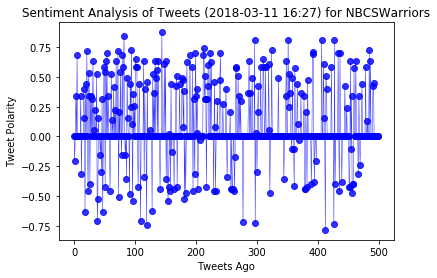

In [11]:
plt.plot(np.arange(len(nbcwarriors_sentiments["Compound"])),
                   nbcwarriors_sentiments["Compound"],marker = 'o', color='blue', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, twitter_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("NBCSWarriors.png")
plt.show()

         
         

In [15]:
# Created a news_mood function to update twitter status with media 
def news_mood():
    try:
        api.update_with_media("NBCSWarriors.png")
        print("Tweeted media successfully")
    except Exception as e:
        print(e)
    

In [17]:
# Set timer to run every minute for 5 minutes max
interval = 60 #seconds
t_end = time.time() + interval * 5
while time.time() < t_end:
    news_mood()
    time.sleep(interval)

Tweeted media successfully
Tweeted media successfully
Tweeted media successfully
Tweeted media successfully
Tweeted media successfully
